<a href="https://colab.research.google.com/github/Varshini151205/ML/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd

In [15]:
#load data
data=pd.read_csv("/content/drive/MyDrive/ml lab /house_price_train.csv")
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [16]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [72]:
#data
X=data[['YearBuilt']]
Y=data[['SalePrice']]

In [73]:
#test and train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [74]:
#fit
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [75]:
#prediction
Y_pred = model.predict(X_test)

In [76]:
#print(X.columns)
#print(model.n_features_in_)


In [80]:
#prediction on new data
new_house = pd.DataFrame({'YearBuilt': [2005]})
predicted_price = model.predict(new_house)[0][0]



In [81]:
print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("MSE:", mean_squared_error(Y_test, Y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R2:", r2_score(Y_test, Y_pred))

MAE: 51148.46731516804
MSE: 5447834477.467489
RMSE: 73809.44707466307
R2: 0.28975191793500943


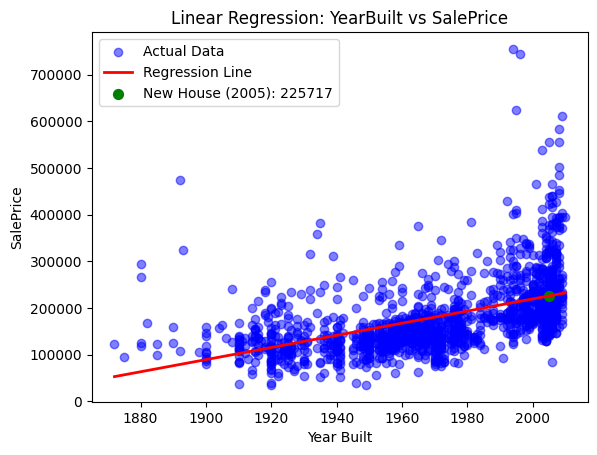

Predicted Price for YearBuilt=2005: 225717.74853491038


In [83]:
X_sorted = X.sort_values(by="YearBuilt")
Y_sorted_pred = model.predict(X_sorted)

# Scatter actual data
plt.scatter(X, Y, color='blue', alpha=0.5, label="Actual Data")

# Regression line
plt.plot(X_sorted, Y_sorted_pred, color='red', linewidth=2, label="Regression Line")

# Plot new house point
plt.scatter(new_house['YearBuilt'], predicted_price,
            color='green', s=200, marker='.',
            label=f"New House (2005): {int(predicted_price)}")

# Labels and legend
plt.xlabel("Year Built")
plt.ylabel("SalePrice")
plt.title("Linear Regression: YearBuilt vs SalePrice")
plt.legend()
plt.show()

print("Predicted Price for YearBuilt=2005:", predicted_price)